# 公式推导

![](公式推导.png)
![](公式推导1.png)
![](公式推导2.png)
自己尝试推导，注意要点：最后的w向量，是一个n\*1的向量，所以需要转置

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0,10.,size=100)

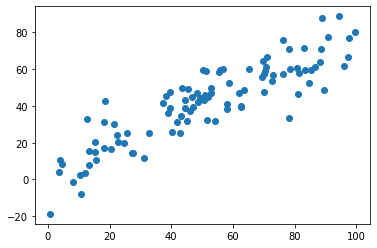

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

In [11]:
def demean(X):
    return X - np.mean(X, axis=0)

# 尝试用for循环理解上述公式
def demean_myself(X):
    for i in range(X.shape[1]):
        X[:,i] = X[:,i] - np.mean(X[:,i])
    return X

In [12]:
X_demean = demean(X)

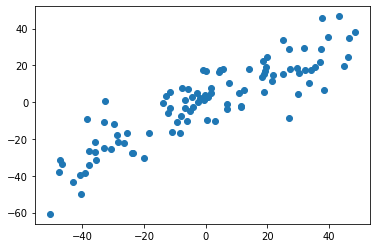

In [13]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [15]:
np.mean(X_demean[:,0])

-3.730349362740526e-16

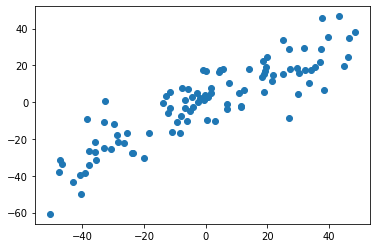

In [16]:
X_demean = demean_myself(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [17]:
np.mean(X_demean[:,0])

2.1316282072803005e-16

### 梯度上升法

In [27]:
def f(w,X):
    return np.sum(X.dot(w)**2)/len(X)

In [28]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2/len(X)

In [29]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X))/(2*epsilon)
    return res

In [30]:
def direction(w):
    # norm指求模
    return w / np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters = 1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta*gradient
        w = direction(w)  # 注意1：每次都求单位向量，结合公式推导
        if(abs(f(w,X)-f(last_w,X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [31]:
initial_w = np.random.random(X.shape[1]) #注意2：不能用0向量
initial_w

array([0.37452093, 0.78867091])

In [32]:
eta = 0.01

In [33]:
# 注意3：不能使用standardScalar
# 标准化后方差为1

In [34]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.78182546, 0.62349735])

In [36]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)

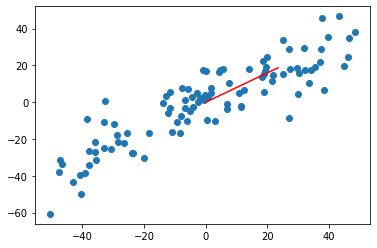

In [42]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,30*w[0]],[0,30*w[1]],color='r')
plt.show()

# 用极端例子测试

In [45]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0.,100.,size=100)
X2[:,1] = 0.75*X2[:,0]+3.

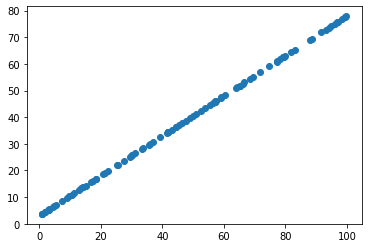

In [48]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

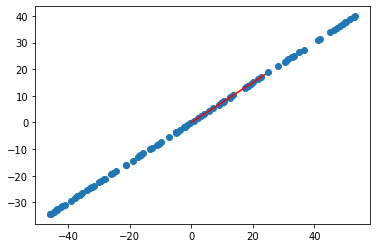

In [50]:
initial_w = np.random.random(X2.shape[1])
eta = 0.001
X2_demean = demean(X2)
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,30*w2[0]],[0,30*w2[1]],color='r')
plt.show()

In [51]:
w2

array([0.79999981, 0.60000025])

In [ ]:
# 